In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot  
from statsmodels.tsa.stattools import adfuller

In [2]:
#Importing data
Beijing = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/BeijingPM20100101_20151231.csv")

In [3]:
#Delet non-useful data
Beijing.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'season', 'precipitation', 'Iprec'], 
               axis=1,
              inplace=True)

Beijing.sum()

No            1.382565e+09
year          1.058253e+08
month         3.430560e+05
day           8.269680e+05
hour          6.047160e+05
PM_US Post    4.832327e+06
DEWP          1.090780e+05
HUMI          2.852704e+06
PRES          5.310524e+07
TEMP          6.618140e+05
Iws           1.223084e+06
dtype: float64

In [4]:
Beijing.dropna(axis=0, how="any",inplace=True)

In [5]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#Beijing['cbwd']=labelencoder.fit_transform(Beijing['cbwd'])
#Beijing

In [6]:
# from datetime import datetime
Beijing['Year.Month'] = Beijing['year'].map(str) +"/"+ Beijing['month'].map(str) 
Beijing['Date'] = pd.to_datetime(Beijing['year'].map(str) +"/"+ Beijing['month'].map(str) +"/"+ Beijing['day'].map(str))
Beijing

No  year  month  day  hour  PM_US Post  DEWP  HUMI    PRES  TEMP  \
23        24  2010      1    1    23       129.0 -17.0  41.0  1020.0  -5.0   
24        25  2010      1    2     0       148.0 -16.0  38.0  1020.0  -4.0   
25        26  2010      1    2     1       159.0 -15.0  42.0  1020.0  -4.0   
26        27  2010      1    2     2       181.0 -11.0  63.5  1021.0  -5.0   
27        28  2010      1    2     3       138.0  -7.0  85.0  1022.0  -5.0   
...      ...   ...    ...  ...   ...         ...   ...   ...     ...   ...   
52579  52580  2015     12   31    19       133.0  -8.0  68.0  1031.0  -3.0   
52580  52581  2015     12   31    20       169.0  -8.0  63.0  1030.0  -2.0   
52581  52582  2015     12   31    21       203.0 -10.0  73.0  1030.0  -6.0   
52582  52583  2015     12   31    22       212.0 -10.0  73.0  1030.0  -6.0   
52583  52584  2015     12   31    23       235.0  -9.0  79.0  1029.0  -6.0   

      cbwd   Iws Year.Month       Date  
23      cv  0.89     2010/1 2010-01-01  
24      SE  1.79     2010/1 2010-01-02  
25      SE  2.68     2010/1 2010-01-02  
26      SE  3.57     2010/1 2010-01-02  
27      SE  5.36     2010/1 2010-01-02  
...    ...   ...        ...        ...  
52579   SE  7.14    2015/12 2015-12-31  
52580   SE  8.03    2015/12 2015-12-31  
52581   NE  0.89    2015/12 2015-12-31  
52582   NE  1.78    2015/12 2015-12-31  
52583   NE  2.67    2015/12 2015-12-31  

[50048 rows x 14 columns]

In [7]:
Beijing.groupby(['year']).size()

year
2010    8091
2011    8033
2012    8293
2013    8678
2014    8661
2015    8292
dtype: int64

In [8]:
by_date = Beijing.groupby(['Date']).mean()

#Beijing.groupby(['Year.Month']).size()
#by_month = Beijing.groupby(['Year.Month']).mean()
#by_month

#by_date

In [9]:
by_date.index = pd.to_datetime(by_date.index, 
                             format='%d-%m-%Y %H:%M')
#by_date.index.to_timestamp()
#by_date.index

In [10]:
by_date['Date'] = by_date.index
#by_date

In [11]:
data_1314 = by_date[(by_date['Date'] >=pd.to_datetime('20130101')) & (by_date['Date'] <= pd.to_datetime('20141231'))]
data_1314 

No    year  month   day  hour  PM_US Post       DEWP  \
Date                                                                    
2013-01-01  26316.5  2013.0    1.0   1.0  11.5   15.833333 -20.541667   
2013-01-02  26340.5  2013.0    1.0   2.0  11.5   18.625000 -27.458333   
2013-01-03  26364.5  2013.0    1.0   3.0  11.5   25.083333 -24.583333   
2013-01-04  26388.5  2013.0    1.0   4.0  11.5   85.500000 -21.083333   
2013-01-05  26412.5  2013.0    1.0   5.0  11.5   61.166667 -21.083333   
...             ...     ...    ...   ...   ...         ...        ...   
2014-12-27  43716.5  2014.0   12.0  27.0  11.5  247.916667  -9.666667   
2014-12-28  43740.5  2014.0   12.0  28.0  11.5  196.416667 -10.791667   
2014-12-29  43764.5  2014.0   12.0  29.0  11.5  151.791667 -12.333333   
2014-12-30  43788.5  2014.0   12.0  30.0  11.5   38.625000 -13.916667   
2014-12-31  43812.5  2014.0   12.0  31.0  11.5   10.458333 -21.791667   

                 HUMI         PRES       TEMP         Iws       Date  
Date                                                                  
2013-01-01  38.291667  1023.666667  -7.208333   46.646667 2013-01-01  
2013-01-02  23.333333  1039.458333 -10.500000  233.056250 2013-01-02  
2013-01-03  29.625000  1043.458333  -9.875000   96.394583 2013-01-03  
2013-01-04  45.291667  1032.791667 -10.666667   12.841667 2013-01-04  
2013-01-05  35.666667  1028.708333  -7.583333    8.886250 2013-01-05  
...               ...          ...        ...         ...        ...  
2014-12-27  57.291667  1027.833333  -1.791667    9.278333 2014-12-27  
2014-12-28  44.208333  1019.958333   1.583333   10.948750 2014-12-28  
2014-12-29  42.541667  1013.750000   0.750000    8.000000 2014-12-29  
2014-12-30  31.375000  1019.125000   1.875000    9.778333 2014-12-30  
2014-12-31  20.375000  1032.125000  -1.916667  167.458333 2014-12-31  

[730 rows x 12 columns]

In [12]:
#data_1314['Date'] = pd.to_datetime(data_1314.index) 
#print(data_1314['Date'].head())

In [13]:
data_10 = by_date[by_date['Date'] <= pd.to_datetime('20101231')]
data_11 = by_date[(by_date['Date'] >=pd.to_datetime('20110101')) & (by_date['Date'] <= pd.to_datetime('20111231'))]
data_12 = by_date[(by_date['Date'] >=pd.to_datetime('20120101')) & (by_date['Date'] <= pd.to_datetime('20121231'))]
data_13 = by_date[(by_date['Date'] >=pd.to_datetime('20130101')) & (by_date['Date'] <= pd.to_datetime('20131231'))]
data_14 = by_date[(by_date['Date'] >=pd.to_datetime('20140101')) & (by_date['Date'] <= pd.to_datetime('20141231'))]
data_15 = by_date[(by_date['Date'] >=pd.to_datetime('20150101')) & (by_date['Date'] <= pd.to_datetime('20151231'))]

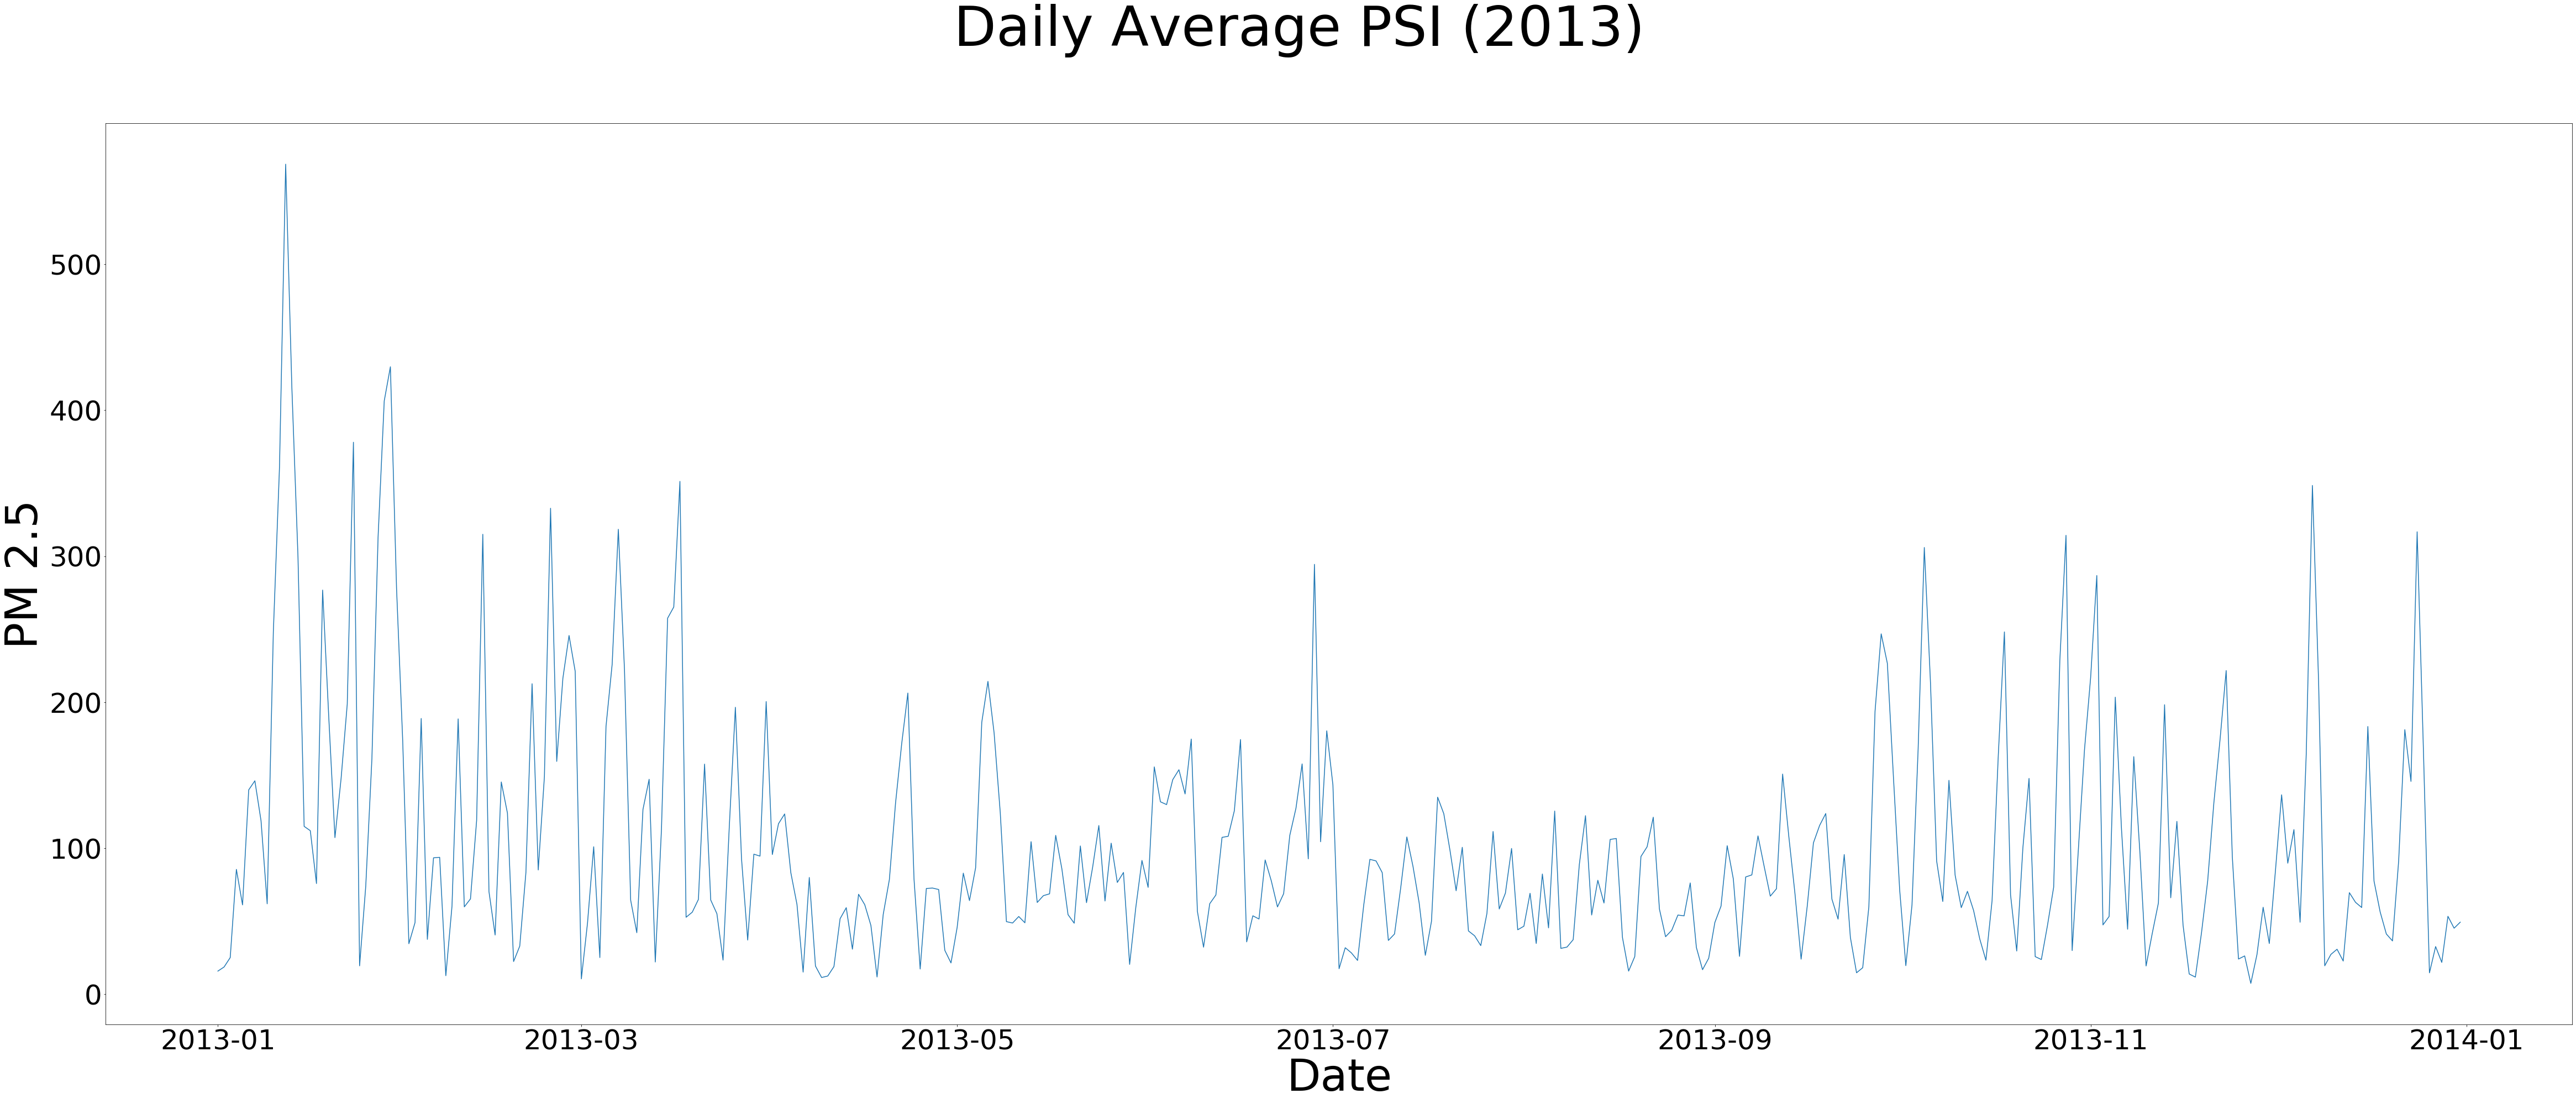

In [14]:

plt.figure(figsize=(80,30)).suptitle('Daily Average PSI (2013)', fontsize=100)
plt.plot(data_13['Date'], data_13['PM_US Post'])

plt.xlabel('Date', fontsize=80)
plt.ylabel('PM 2.5', fontsize=80)
plt.xticks(fontsize=50, rotation=0)
plt.yticks(fontsize=50, rotation=0)
plt.show()

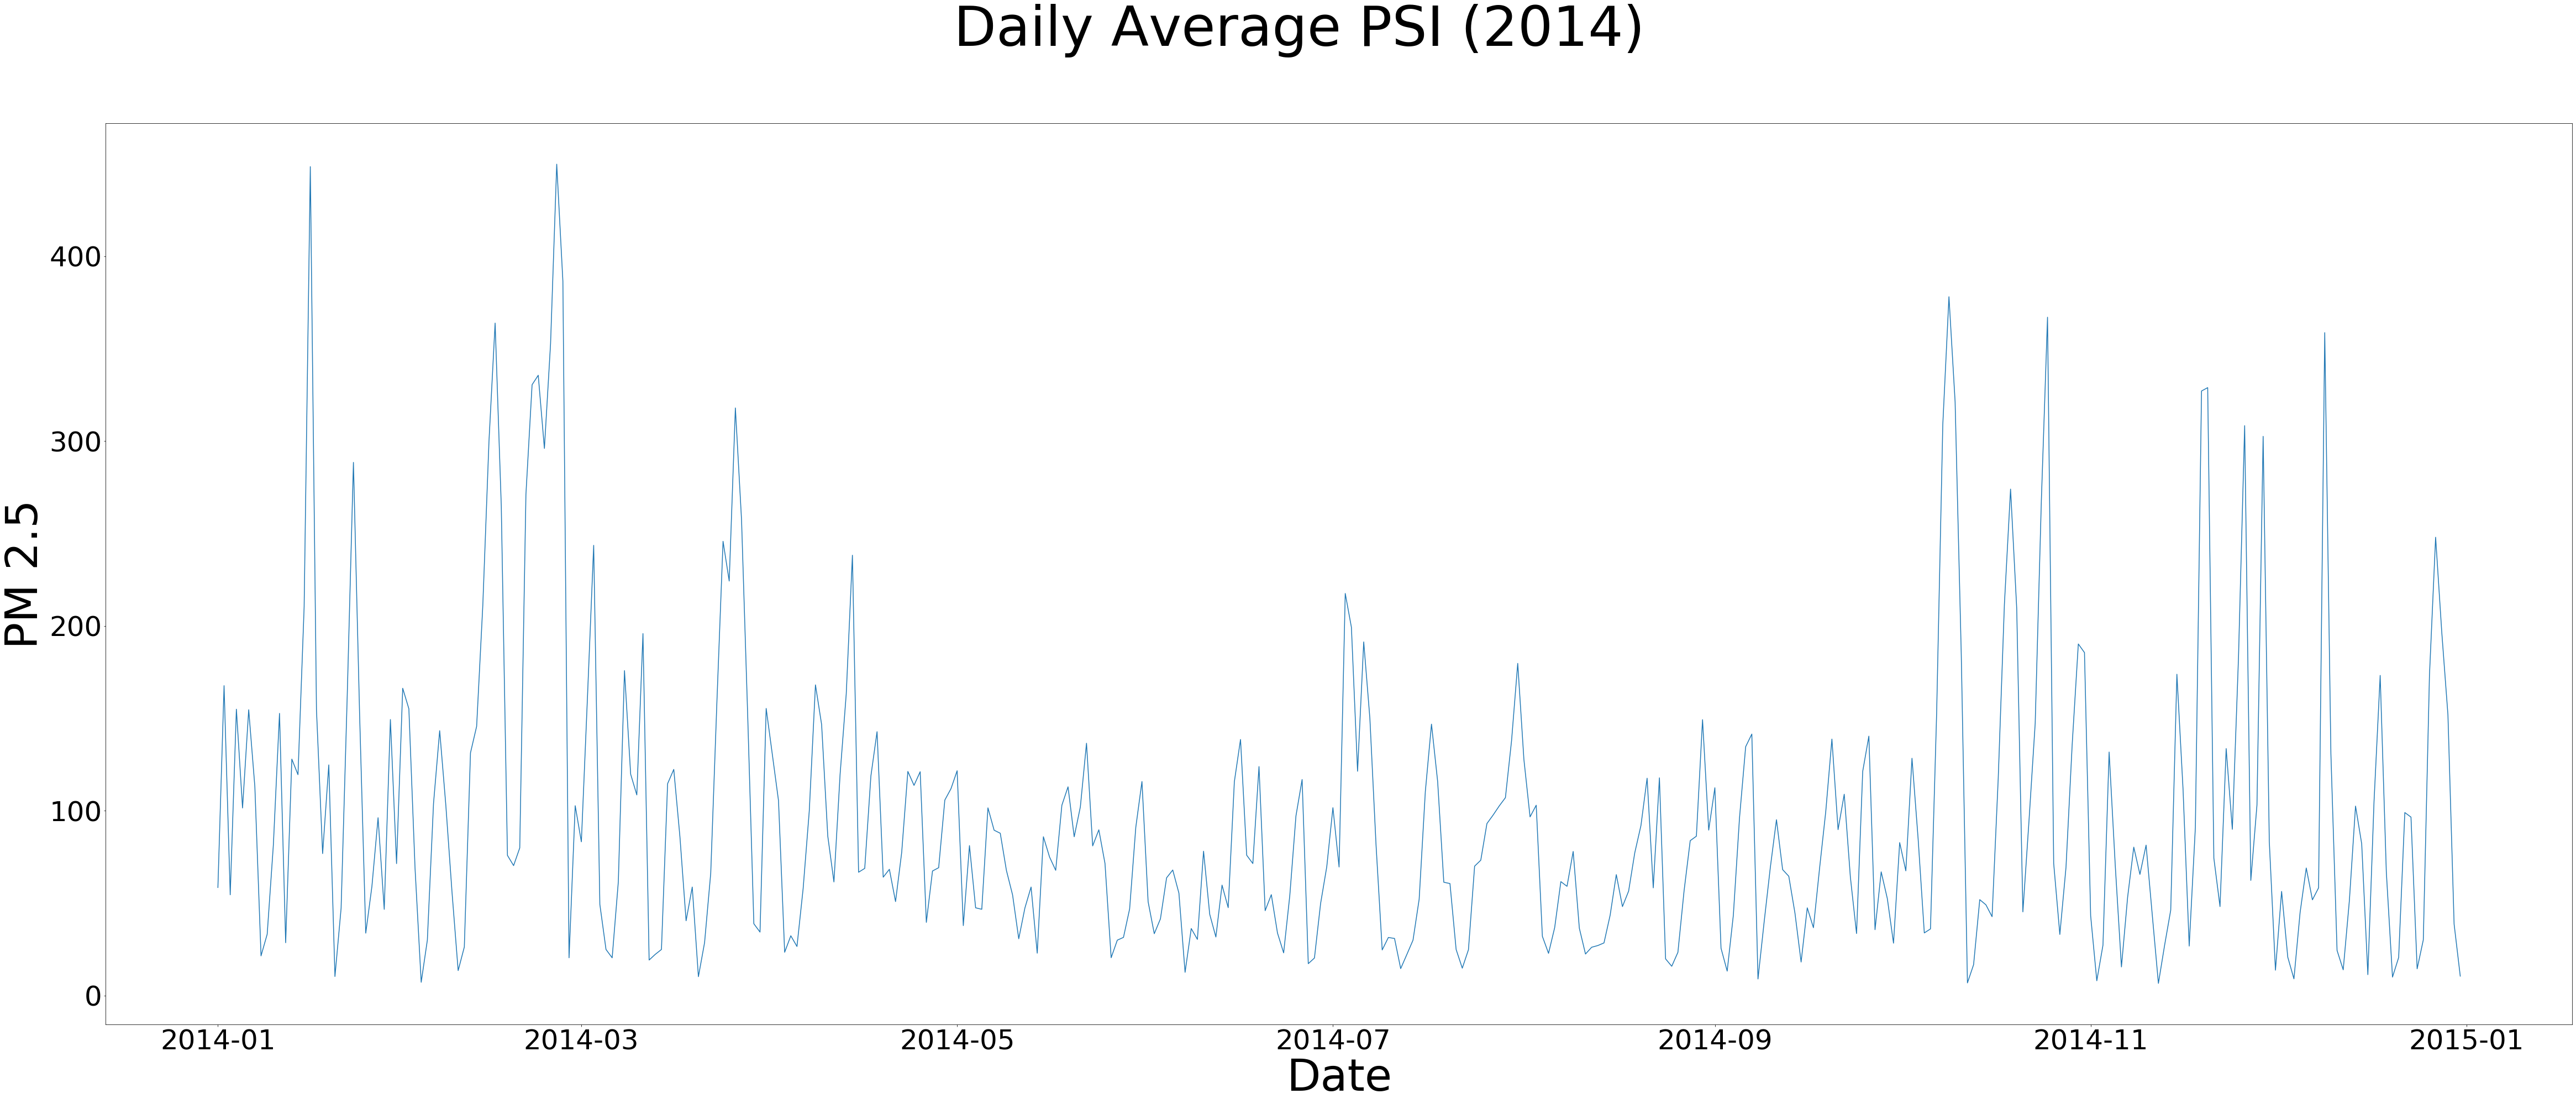

In [15]:
# Plot

plt.figure(figsize=(80,30)).suptitle('Daily Average PSI (2014)', fontsize=100)
plt.plot(data_14['Date'], data_14['PM_US Post'])

plt.xlabel('Date', fontsize=80)
plt.ylabel('PM 2.5', fontsize=80)
plt.xticks(fontsize=50, rotation=0)
plt.yticks(fontsize=50, rotation=0)
plt.show()

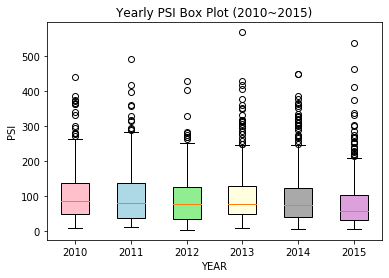

In [16]:
all_data = [data_10['PM_US Post'], data_11['PM_US Post'], data_12['PM_US Post'], data_13['PM_US Post'], data_14['PM_US Post'], data_15['PM_US Post']]
labels = ['2010', '2011', '2012', '2013', '2014', '2015']

bplot = plt.boxplot(all_data, patch_artist=True, labels=labels)  # 设置箱型图可填充
plt.title('Yearly PSI Box Plot (2010~2015)')

colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow', 'darkgrey', 'plum']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)  # 为不同的箱型图填充不同的颜色

#plt.yaxis.grid(True)
plt.xlabel('YEAR')
plt.ylabel('PSI')
plt.show()

In [17]:
Good_10 = sum(data_10['PM_US Post'] <= 35)
Moderate_10 = sum((data_10['PM_US Post'] >35) & (data_10['PM_US Post'] <=75))
Sensitive_10 = sum((data_10['PM_US Post'] >75) & (data_10['PM_US Post'] <=115))
Unhealthy_10 = sum((data_10['PM_US Post'] >115) & (data_10['PM_US Post'] <=150))
Severe_10 = sum((data_10['PM_US Post'] >150) & (data_10['PM_US Post'] <=250))
Hazardous_10 =sum(data_10['PM_US Post'] > 250)

Good_11 = sum(data_11['PM_US Post'] <= 35)
Moderate_11 = sum((data_11['PM_US Post'] >35) & (data_11['PM_US Post'] <=75))
Sensitive_11 = sum((data_11['PM_US Post'] >75) & (data_11['PM_US Post'] <=115))
Unhealthy_11 = sum((data_11['PM_US Post'] >115) & (data_11['PM_US Post'] <=150))
Severe_11 = sum((data_11['PM_US Post'] >150) & (data_11['PM_US Post'] <=250))
Hazardous_11 =sum(data_11['PM_US Post'] > 250)

Good_12 = sum(data_12['PM_US Post'] <= 35)
Moderate_12 = sum((data_12['PM_US Post'] >35) & (data_12['PM_US Post'] <=75))
Sensitive_12 = sum((data_12['PM_US Post'] >75) & (data_12['PM_US Post'] <=115))
Unhealthy_12 = sum((data_12['PM_US Post'] >115) & (data_12['PM_US Post'] <=150))
Severe_12 = sum((data_12['PM_US Post'] >150) & (data_12['PM_US Post'] <=250))
Hazardous_12 =sum(data_12['PM_US Post'] > 250)

Good_13 = sum(data_13['PM_US Post'] <= 35)
Moderate_13 = sum((data_13['PM_US Post'] >35) & (data_13['PM_US Post'] <=75))
Sensitive_13 = sum((data_13['PM_US Post'] >75) & (data_13['PM_US Post'] <=115))
Unhealthy_13 = sum((data_13['PM_US Post'] >115) & (data_13['PM_US Post'] <=150))
Severe_13 = sum((data_13['PM_US Post'] >150) & (data_13['PM_US Post'] <=250))
Hazardous_13 =sum(data_13['PM_US Post'] > 250)

Good_14 = sum(data_14['PM_US Post'] <= 35)
Moderate_14 = sum((data_14['PM_US Post'] >35) & (data_14['PM_US Post'] <=75))
Sensitive_14 = sum((data_14['PM_US Post'] >75) & (data_14['PM_US Post'] <=115))
Unhealthy_14 = sum((data_14['PM_US Post'] >115) & (data_14['PM_US Post'] <=150))
Severe_14 = sum((data_14['PM_US Post'] >150) & (data_14['PM_US Post'] <=250))
Hazardous_14 =sum(data_14['PM_US Post'] > 250)

Good_15 = sum(data_15['PM_US Post'] <= 35)
Moderate_15 = sum((data_15['PM_US Post'] >35) & (data_15['PM_US Post'] <=75))
Sensitive_15 = sum((data_15['PM_US Post'] >75) & (data_15['PM_US Post'] <=115))
Unhealthy_15 = sum((data_15['PM_US Post'] >115) & (data_15['PM_US Post'] <=150))
Severe_15 = sum((data_15['PM_US Post'] >150) & (data_15['PM_US Post'] <=250))
Hazardous_15 =sum(data_15['PM_US Post'] > 250)


category = ["Good", "Moderate", "Sensitive", "Unhealthy", "Very-Unhealthy", "Hazardous"]
color = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']
size_10 = [Good_10, Moderate_10, Sensitive_10, Unhealthy_10, Severe_10, Hazardous_10]
size_11 = [Good_11, Moderate_11, Sensitive_11, Unhealthy_11, Severe_11, Hazardous_11]
size_12 = [Good_12, Moderate_12, Sensitive_12, Unhealthy_12, Severe_12, Hazardous_12]
size_13 = [Good_13, Moderate_13, Sensitive_13, Unhealthy_13, Severe_13, Hazardous_13]
size_14 = [Good_14, Moderate_14, Sensitive_14, Unhealthy_14, Severe_14, Hazardous_14]
size_15 = [Good_15, Moderate_15, Sensitive_15, Unhealthy_15, Severe_15, Hazardous_15]


fig = plt.figure(figsize=(150,100))

#this line will produce a figure which has 2 row and 3 columns 
#(0, 0) specifies the left upper coordinate of your plot
ax1 = plt.subplot2grid((2,3),(0,0))
patches, l_text, p_text =  plt.pie(size_10, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.title("2010 AQL",fontsize=150)

ax1 = plt.subplot2grid((2,3),(0,1))
patches, l_text, p_text =  plt.pie(size_11, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.title("2011 AQL",fontsize=150)

ax1 = plt.subplot2grid((2,3),(0,2))
patches, l_text, p_text =  plt.pie(size_12, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.title("2012 AQL",fontsize=150)

ax1 = plt.subplot2grid((2,3),(1,0))
patches, l_text, p_text =  plt.pie(size_13, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.title("2013 AQL",fontsize=150)

ax1 = plt.subplot2grid((2,3),(1,1))
patches, l_text, p_text =  plt.pie(size_14, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.title("2014 AQL",fontsize=150)

ax1 = plt.subplot2grid((2,3),(1,2))
patches, l_text, p_text =  plt.pie(size_15, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.title("2015 AQL",fontsize=150)

plt.show()

In [18]:
#根据数据表中的降雨和降雪情况，找到降水超过6小时的日期，将这些日期对应的PM2.5值绘制图形，如下所示。

In [19]:
#根据数据提供的风向和风速情况，找到一天之内累计风速大于48m/s（相当于持续刮4级风累计6小时）的日期对应的pm2.5值，绘图如下所示。

In [20]:
#实际测量数值显示，降水和pm2.5数值没有因果性，降水本身并不能带动空气中的颗粒物沉降，颗粒物的浓度不会明显降低，
#降水不会对pm2.5数值产生显著影响。刮风可以显著降低pm2.5值，空气中颗粒物是被吹跑了而非沉降，浓度降低，pm2.5值明显下降。

#看来提高空气质量，降低pm2.5的有效措施不是盼下雨而是等风来！

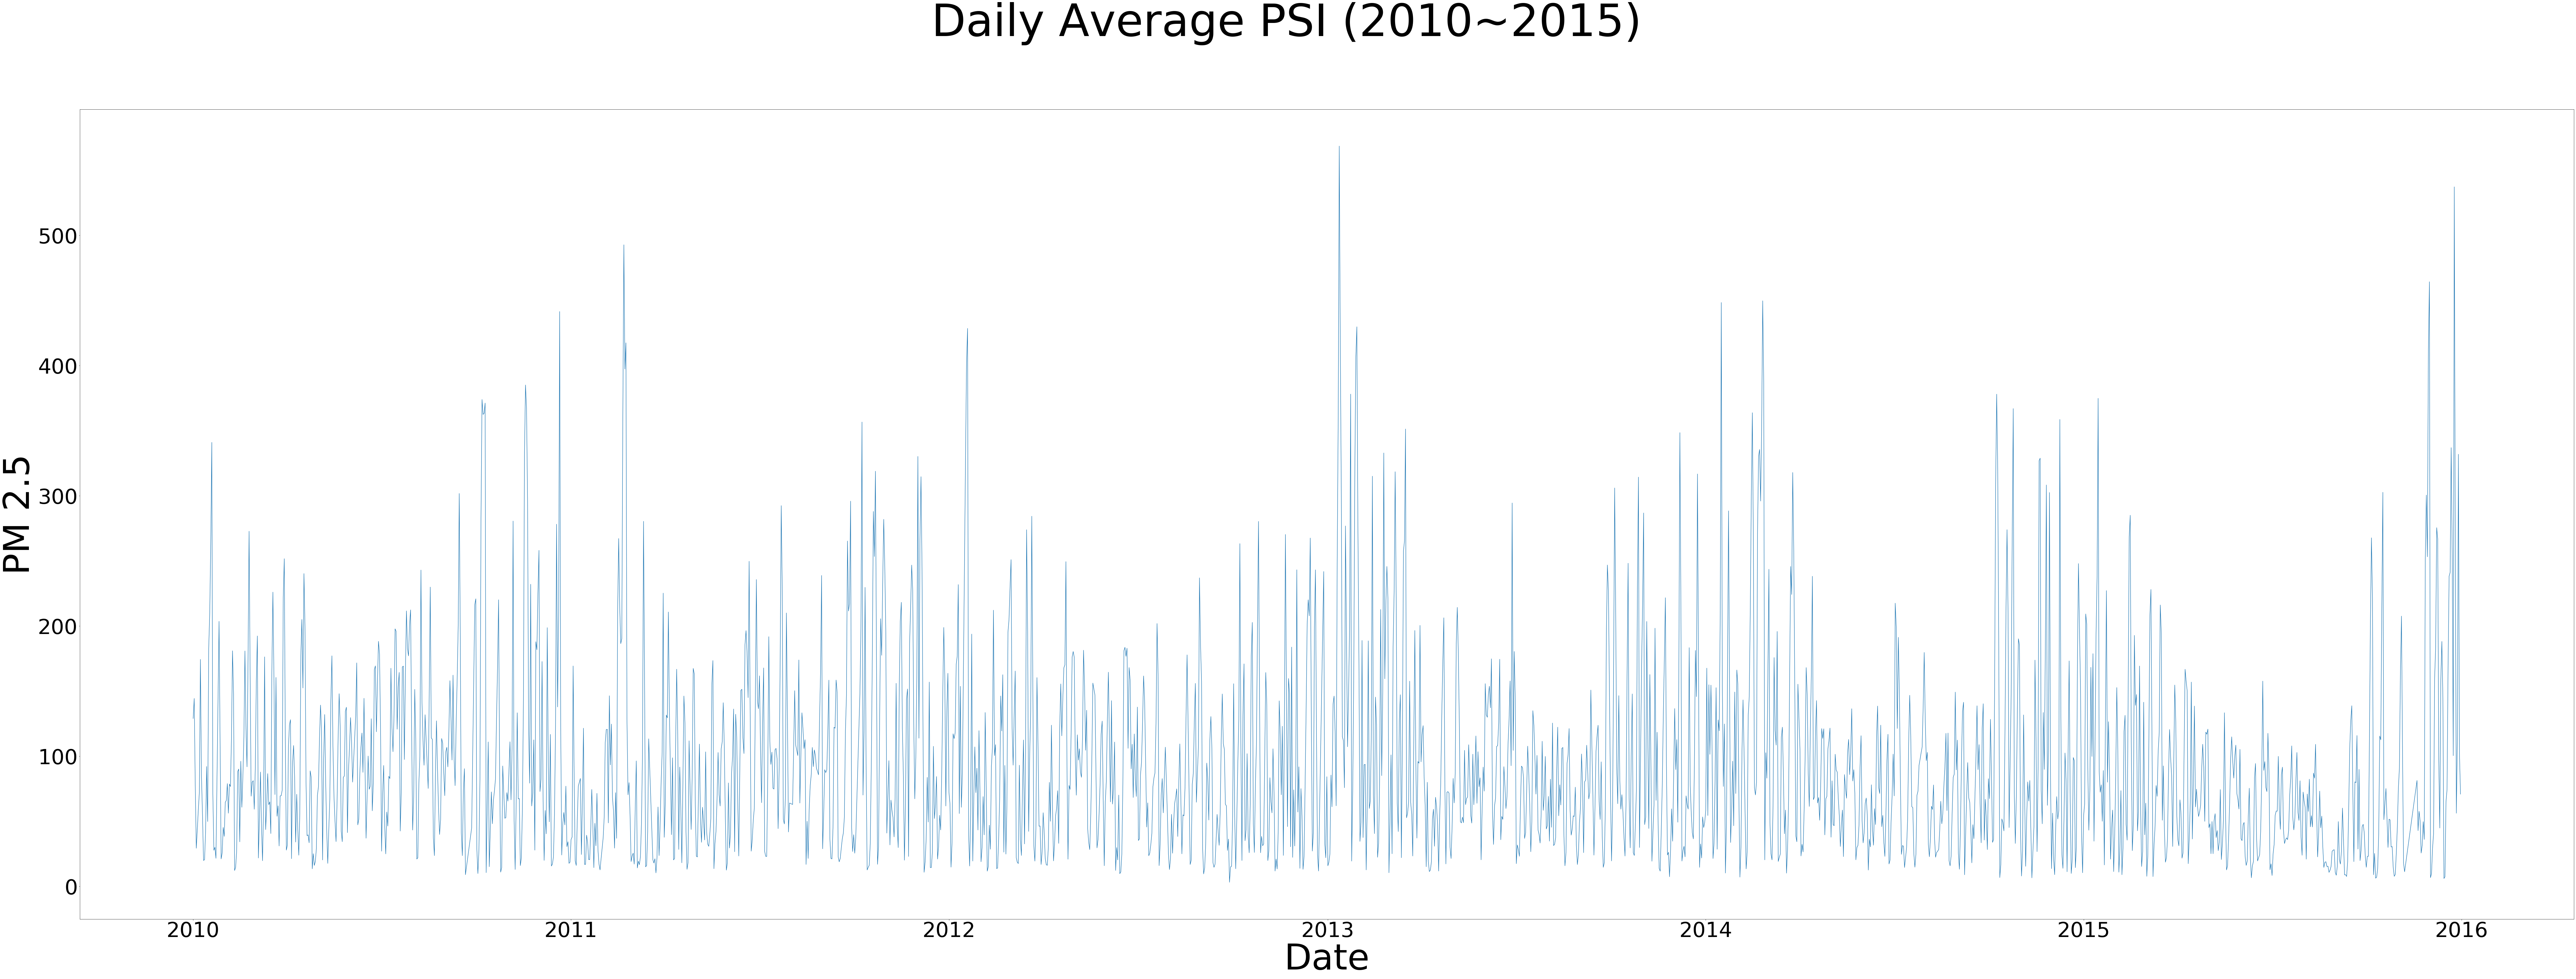

In [21]:
# 利用时间序列ARMA模型分析并预测pm2.5值
# 还是以天为单位分析这五年之内的pm2.5值，并绘制曲线



plt.figure(figsize=(150,50)).suptitle('Daily Average PSI (2010~2015)', fontsize=150)
plt.plot(by_date['Date'], by_date['PM_US Post'])

plt.xlabel('Date', fontsize=120)
plt.ylabel('PM 2.5', fontsize=120)
plt.xticks(fontsize=70, rotation=0)
plt.yticks(fontsize=70, rotation=0)
plt.show()

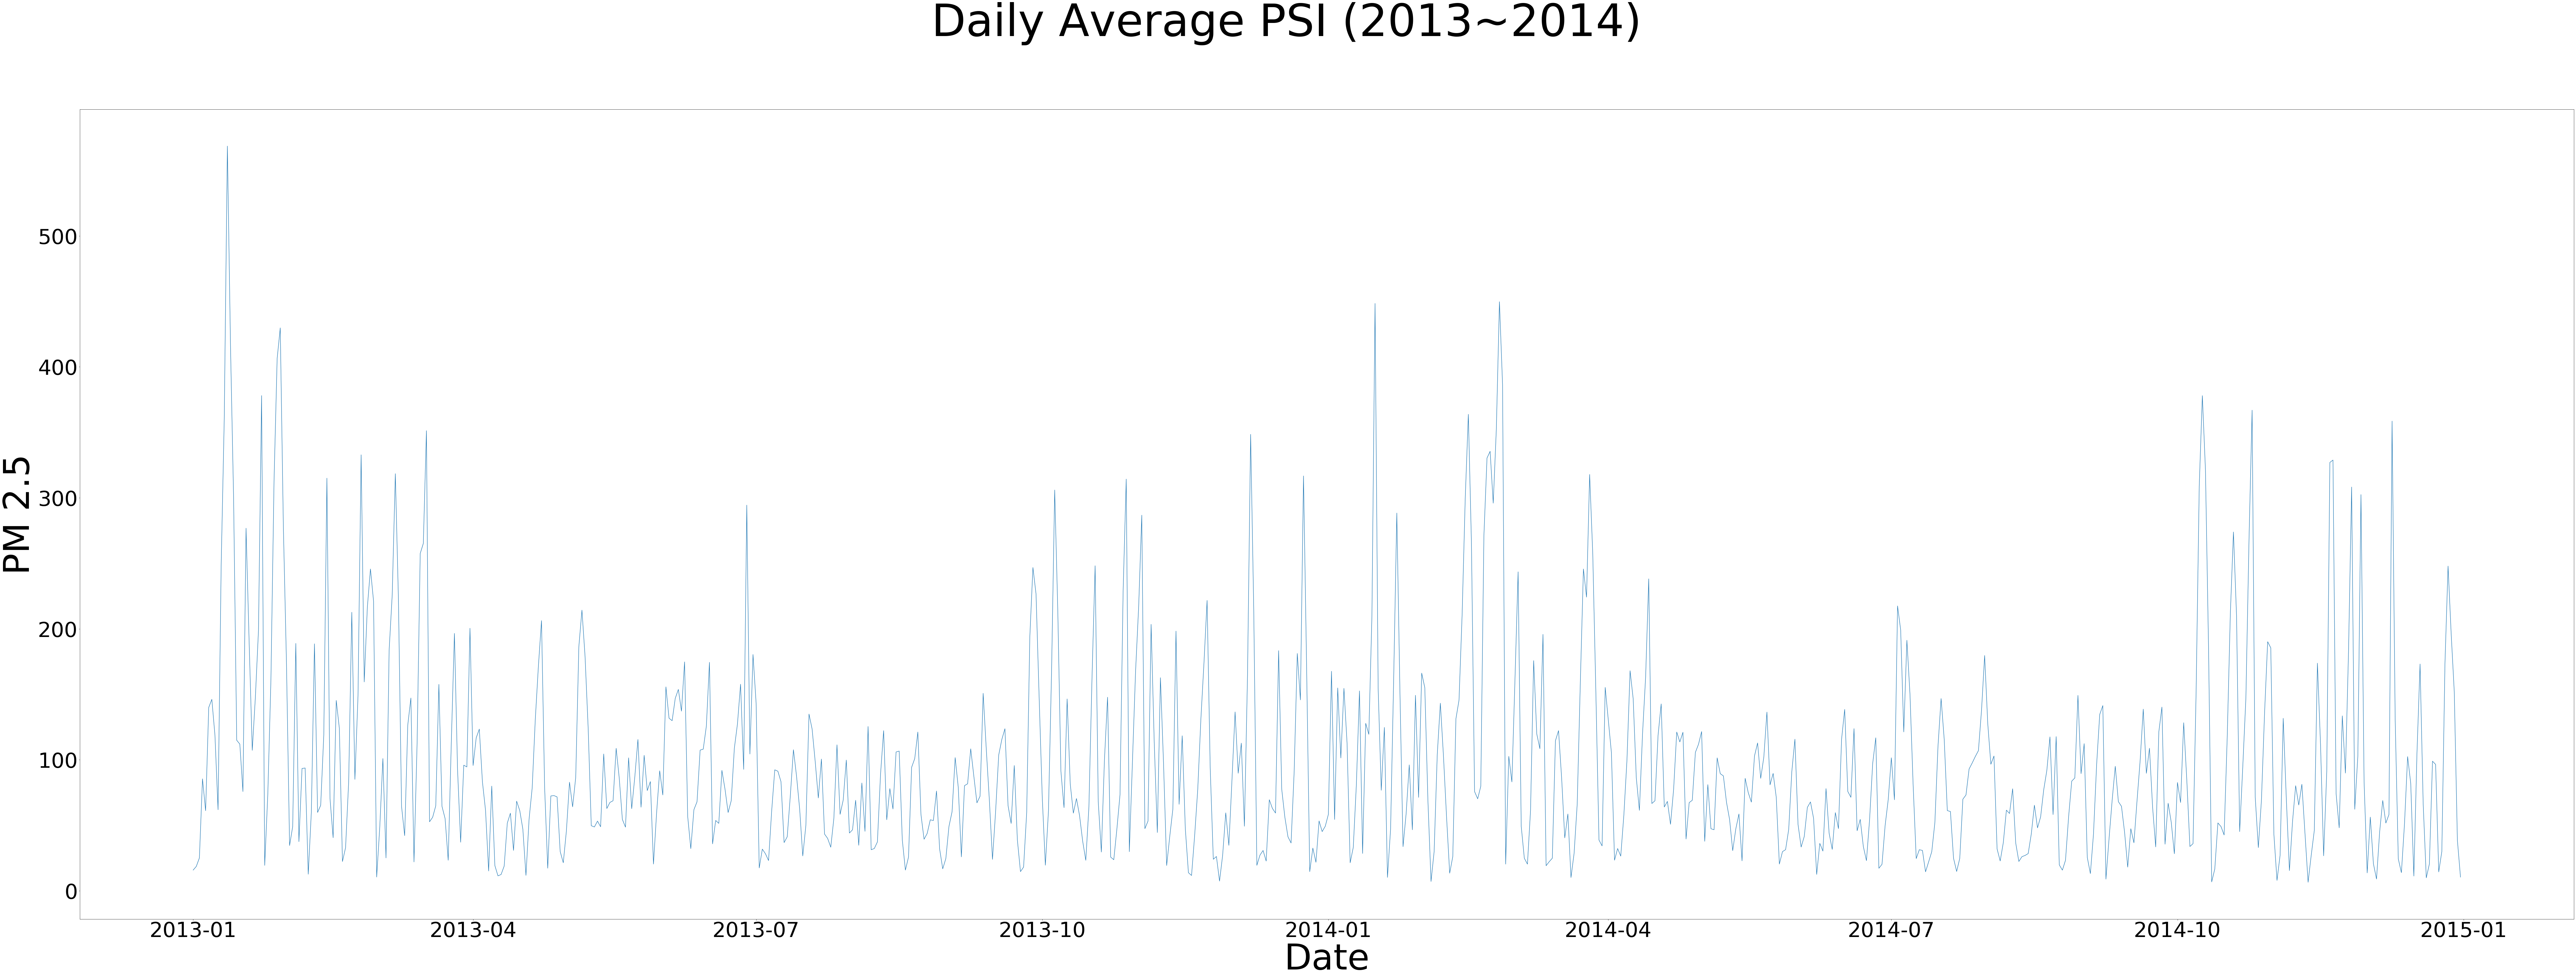

In [22]:
plt.figure(figsize=(150,50)).suptitle('Daily Average PSI (2013~2014)', fontsize=150)
plt.plot(data_1314['Date'], data_1314['PM_US Post'])

plt.xlabel('Date', fontsize=120)
plt.ylabel('PM 2.5', fontsize=120)
plt.xticks(fontsize=70, rotation=0)
plt.yticks(fontsize=70, rotation=0)
plt.show()

In [23]:
temp = np.array(data_1314['PM_US Post'])
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

# 1%、%5、%10不同程度拒绝原假设的统计值和ADF Test result的比较，
# ADF Test result同时小于1%、5%、10%即说明非常好地拒绝该假设.本数据中，adf结果为-10.196260166501675， 小于三个level的统计值。
# P-value是否非常接近0.本数据中，P-value 为 6.135126490122563e-18,接近0.
# ADF检验的原假设是存在单位根，只要这个统计值是小于1%水平下的数字就可以极显著的拒绝原假设，认为数据平稳。

value
Test Statistic Value            -5.17028
p-value                      1.01071e-05
Lags Used                             14
Number of Observations Used          715
Critical Value(1%)              -3.43953
Critical Value(5%)              -2.86559
Critical Value(10%)             -2.56893

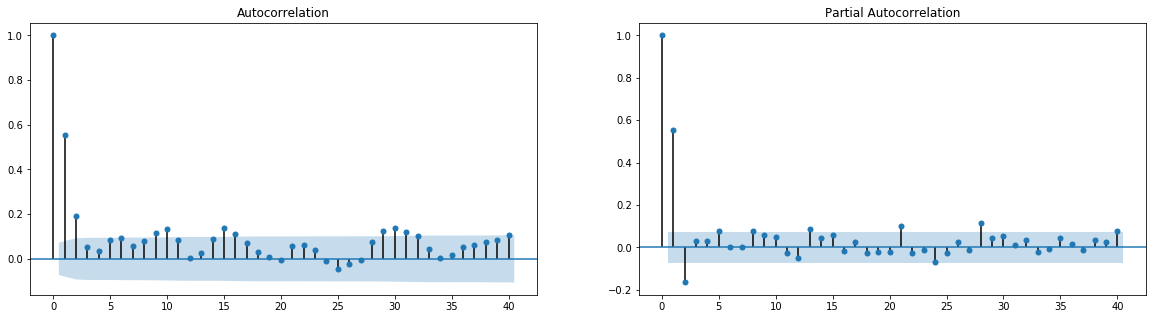

In [24]:

#lag_acf = acf(by_date['PM_US Post'], nlags=40)
#lag_pacf = pacf(by_date['PM_US Post'], nlags=40, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(data_1314['PM_US Post'], lags=40, ax=axes[0], fft=False)
plot_pacf(data_1314['PM_US Post'], lags=40, ax=axes[1])
plt.show()

# Get p=3, q=3.

In [25]:
#t

In [26]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(by_date['PM_US Post'], lags=40, ax=ax1) 
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(by_date['PM_US Post'], lags=40, ax=ax2)

In [27]:
##fig = plt.figure(figsize=(12,8))
##ax1= fig.add_subplot(111)
##diff1 = data_1314['PM_US Post'].diff(1)
##diff1.plot(ax=ax1)

In [28]:
#by_date.index = pd.DatetimeIndex(by_date.index).to_period('D')
#by_date.index = (by_date.index).to_timestamp()
#data_1314 = data_1314.set_index(data_1314).asfreq('d')
#by_date.dropna(axis=0, how="any",inplace=True)
#data_1314.index

In [29]:
#data_1314['PM_US Post'].dropna(axis=0, how="any",inplace=True)

In [30]:

arma_mod03 = sm.tsa.ARMA(data_1314['PM_US Post'],(0,3)).fit()
print("ARMA(0,3): AIC=", arma_mod03.aic,", BIC= ",arma_mod03.bic,", HQ= ",arma_mod03.hqic)

arma_mod30 = sm.tsa.ARMA(data_1314['PM_US Post'],(3,0)).fit()
print("ARMA(3,0): AIC=", arma_mod30.aic,", BIC= ",arma_mod30.bic,", HQ= ",arma_mod30.hqic)

#arma_mod33 = sm.tsa.ARMA(data_1314['PM_US Post'],(3,3)).fit()
#print("ARMA(3,3): AIC=", arma_mod33.aic,", BIC= ",arma_mod33.bic,", HQ= ",arma_mod33.hqic)

#Choose ARMA(0,3) model based on AIC/ BIC/ HQ values

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARMA(0,3): AIC= 8226.694566489263 , BIC=  8249.659789159976 , HQ=  8235.55471883796


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARMA(3,0): AIC= 8227.423369032911 , BIC=  8250.388591703624 , HQ=  8236.283521381609


TypeError: float() argument must be a string or a number, not 'ARMAResultsWrapper'

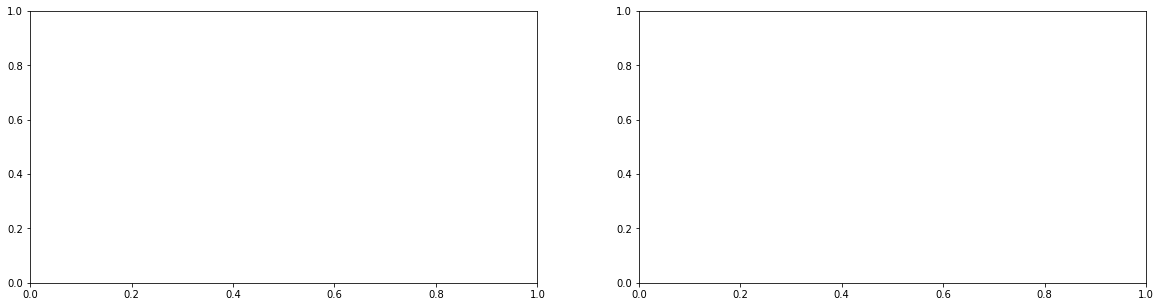

In [31]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(arma_mod03, lags=40, ax=axes[0], fft=False)
plot_pacf(arma_mod03, lags=40, ax=axes[1])
plt.show()

In [ ]:
qqplot(arma_mod03)

In [ ]:
print(arma_mod03, summary())